In [41]:
import pycs
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import absolute_import, division, print_function
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
rung=4

pairA_id = 'quad_pair23A'
pairA_path = os.path.join('laggylight', 'data', 'rung4', 'tdc1_rung4_%s.txt' %pairA_id)



curvesA = pd.read_csv(pairA_path, sep='\s+', skiprows=range(6), names=['time', 'mag_0', 'magerr_0', 'mag_1', 'magerr_1'])
# Add unique_id column and set as index
curvesA['name'] = pairA_id
curvesA.set_index('name', inplace=True)
curvesA.to_csv('quad_pair23A.txt', sep='\t')

In [102]:
pairB_id = 'quad_pair23B'
pairB_path = os.path.join('laggylight', 'data', 'rung4', 'tdc1_rung4_%s.txt' %pairB_id)

curvesB = pd.read_csv(pairB_path, sep='\s+', skiprows=range(6), names=['time', 'mag_0', 'magerr_0', 'mag_1', 'magerr_1'])
# Add unique_id column and set as index
curvesB['name'] = pairB_id
curvesB.set_index('name', inplace=True)
curvesB.to_csv('quad_pair23B.txt', sep='\t')

In [99]:
truth_path = os.path.join('laggylight', 'data', 'truth%d.txt' %rung)
truth = pd.read_csv(truth_path, sep=' ', header=0)
# Extract row belonging to the curves in curves df
truth = truth.loc[truth['name'].isin(['tdc1_rung4_%s.txt' %pairA_id, 'tdc1_rung4_%s.txt' %pairB_id])].copy()

In [93]:
truth

,name,dt,m1,m2,zl,zs,id,tau,sig
764,tdc1_rung4_quad_pair23A.txt,26.06,20.75,21.48,0.91,1.3,24219898,197.27831,0.0057
765,tdc1_rung4_quad_pair23B.txt,10.11,20.73,20.82,0.91,1.3,24219898,197.27831,0.0057


In [108]:
lcs = [
        pycs.gen.lc.rdbimport('quad_pair23A.txt', 'image0', 'mag_0', 'magerr_0', mhjdcolname="time", telescopename="quad_pair23A-dimmer(0)"),
        pycs.gen.lc.rdbimport('quad_pair23A.txt', 'image1', 'mag_1', 'magerr_1', mhjdcolname="time", telescopename="quad_pair23A-brighter(1)"),
    pycs.gen.lc.rdbimport('quad_pair23B.txt', 'image2', 'mag_0', 'magerr_0', mhjdcolname="time", telescopename="quad_pair23B-dimmer(0)"),
        pycs.gen.lc.rdbimport('quad_pair23B.txt', 'image3', 'mag_1', 'magerr_1', mhjdcolname="time", telescopename="quad_pair23B-brighter(1)"),
]

Checking header of "quad_pair23A.txt"...
Reading "quad_pair23A.txt"...
[quad_pair23A-dimmer(0)/image0] with 195 points imported (0 of them masked).
Checking header of "quad_pair23A.txt"...
Reading "quad_pair23A.txt"...
[quad_pair23A-brighter(1)/image1] with 195 points imported (0 of them masked).
Checking header of "quad_pair23B.txt"...
Reading "quad_pair23B.txt"...
[quad_pair23B-dimmer(0)/image2] with 195 points imported (0 of them masked).
Checking header of "quad_pair23B.txt"...
Reading "quad_pair23B.txt"...
[quad_pair23B-brighter(1)/image3] with 195 points imported (0 of them masked).


In [109]:
pycs.gen.mrg.colourise(lcs)

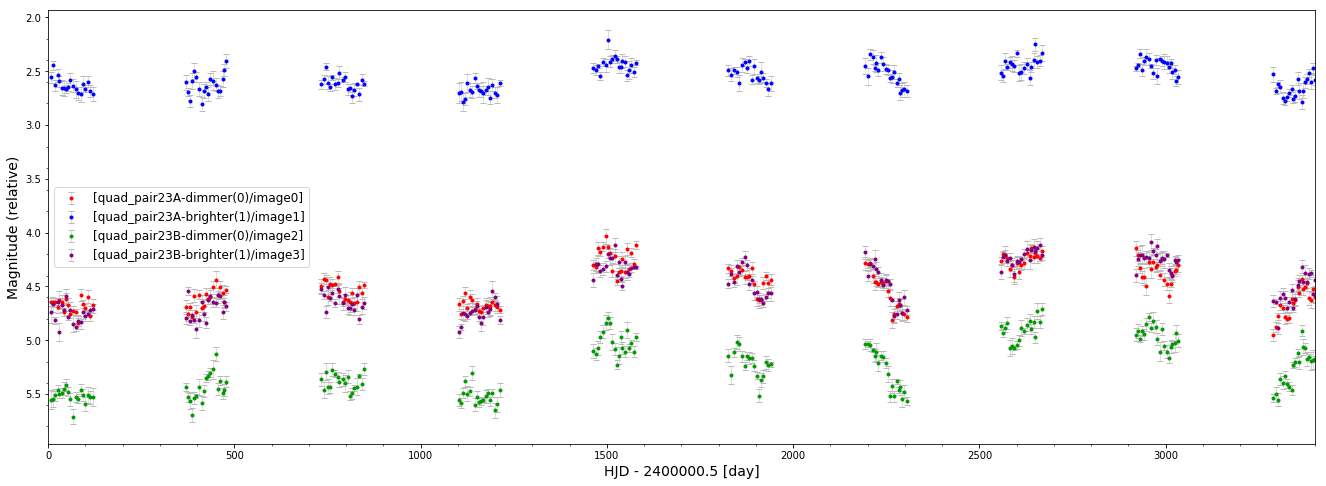

In [110]:
pycs.gen.lc.display(lcs, figsize=(20, 7), jdrange=(0, 3402))

In [111]:
def spl(lcs):
    spline = pycs.spl.topopt.opt_rough(lcs, nit=5, knotstep=50)
    for l in lcs:
        l.resetml()
    spline = pycs.spl.topopt.opt_rough(lcs, nit=5, knotstep=30)
    spline = pycs.spl.topopt.opt_fine(lcs, nit=10, knotstep=20)
    return spline

In [112]:
%%capture
spline = spl(lcs)

In [113]:
basic_time_delays = pycs.gen.lc.getnicetimedelays(lcs, separator="\n", sorted=True)
print("Time Delays (no microlensing):")
print(basic_time_delays)

Time Delays (no microlensing):
image0image1 =  -26.97
image0image2 =   +2.46
image0image3 =   -8.31
image1image2 =  +29.42
image1image3 =  +18.66
image2image3 =  -10.77


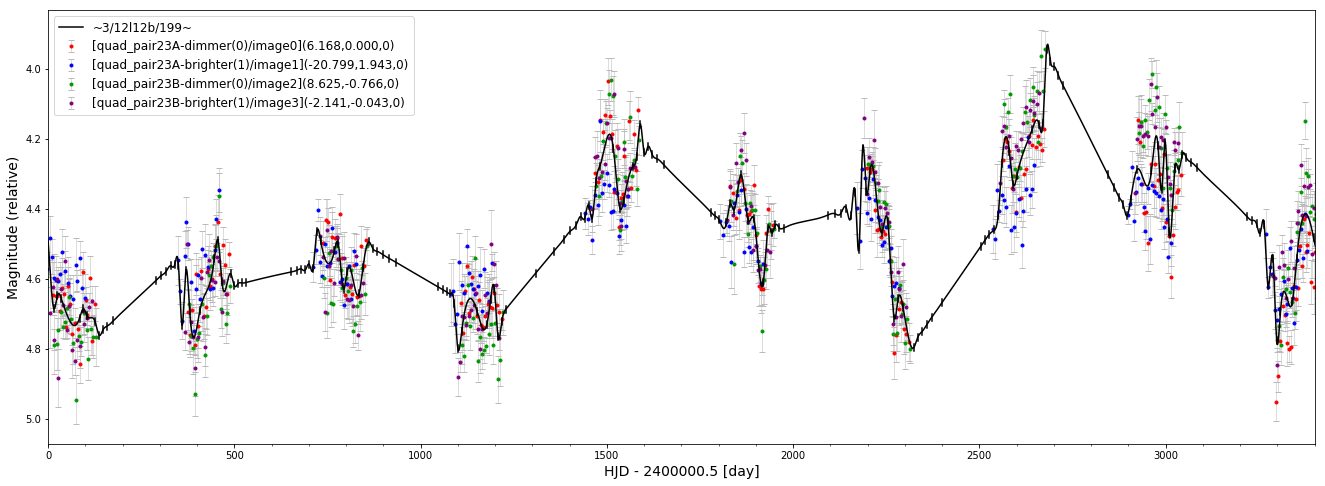

In [114]:
pycs.gen.lc.display(lcs, [spline], knotsize=0.01, figsize=(20, 7), jdrange=(0, 3402))

In [116]:
pycs.gen.polyml.addtolc(lcs[0], nparams=2, autoseasonsgap=600.0)
pycs.gen.polyml.addtolc(lcs[1], nparams=3, autoseasonsgap=600.0)
pycs.gen.polyml.addtolc(lcs[2], nparams=3, autoseasonsgap=600.0)
pycs.gen.polyml.addtolc(lcs[3], nparams=3, autoseasonsgap=600.0)


I replace an existing mircolensing.
I replace an existing mircolensing.


In [117]:
%%capture
spline = spl(lcs)

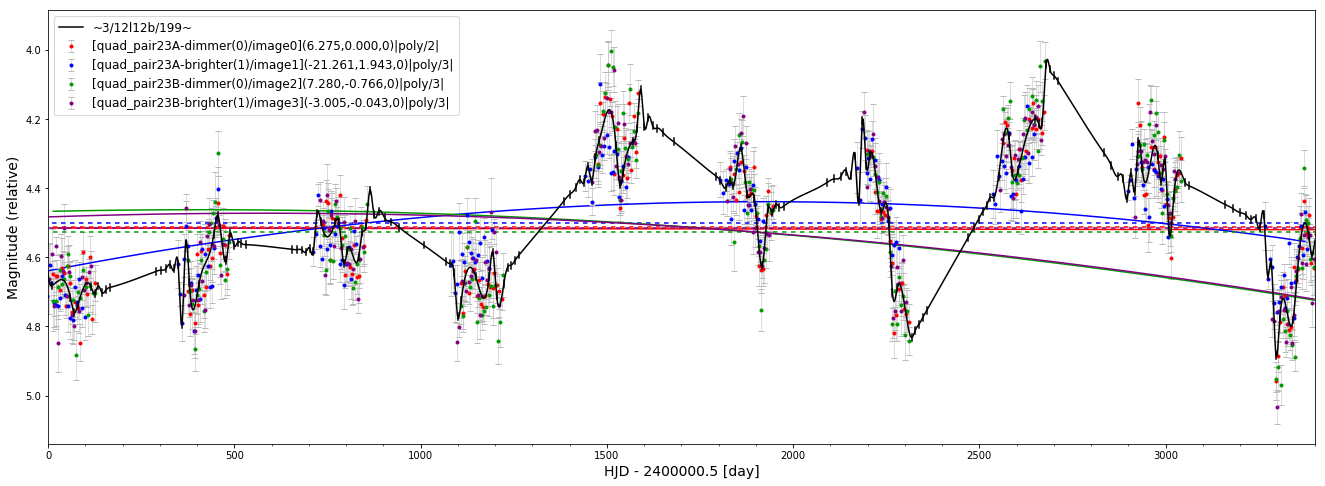

In [118]:
pycs.gen.lc.display(lcs, [spline], knotsize=0.01, figsize=(20, 7), jdrange=(0, 3402))

In [119]:
polynomial_microlensing_time_delays = pycs.gen.lc.getnicetimedelays(lcs, separator="\n", sorted=True)
print("Time Delays (microlensing included, with polynomials):")
print(polynomial_microlensing_time_delays)

print("cf. Time Delays (no microlensing):")
print(basic_time_delays)

Time Delays (microlensing included, with polynomials):
image0image1 =  -27.54
image0image2 =   +1.01
image0image3 =   -9.28
image1image2 =  +28.54
image1image3 =  +18.26
image2image3 =  -10.28
cf. Time Delays (no microlensing):
image0image1 =  -26.97
image0image2 =   +2.46
image0image3 =   -8.31
image1image2 =  +29.42
image1image3 =  +18.66
image2image3 =  -10.77


In [120]:
pycs.gen.splml.addtolc(lcs[0], knotstep=150)
pycs.gen.splml.addtolc(lcs[1], knotstep=150)
pycs.gen.splml.addtolc(lcs[2], knotstep=150)
pycs.gen.splml.addtolc(lcs[3], knotstep=150)


I replace an existing mircolensing.
I replace an existing mircolensing.
I replace an existing mircolensing.
I replace an existing mircolensing.


In [121]:
%%capture
spline = spl(lcs)

In [122]:
spline_microlensing_time_delays = pycs.gen.lc.getnicetimedelays(lcs, separator="\n", sorted=True)
print("Time Delays (microlensing included, with splines):")
print(spline_microlensing_time_delays)

print("cf. Time Delays (microlensing included, with polynomials):")
print(polynomial_microlensing_time_delays)

Time Delays (microlensing included, with splines):
image0image1 =  -25.66
image0image2 =   +1.58
image0image3 =   -8.03
image1image2 =  +27.24
image1image3 =  +17.63
image2image3 =   -9.61
cf. Time Delays (microlensing included, with polynomials):
image0image1 =  -27.54
image0image2 =   +1.01
image0image3 =   -9.28
image1image2 =  +28.54
image1image3 =  +18.26
image2image3 =  -10.28


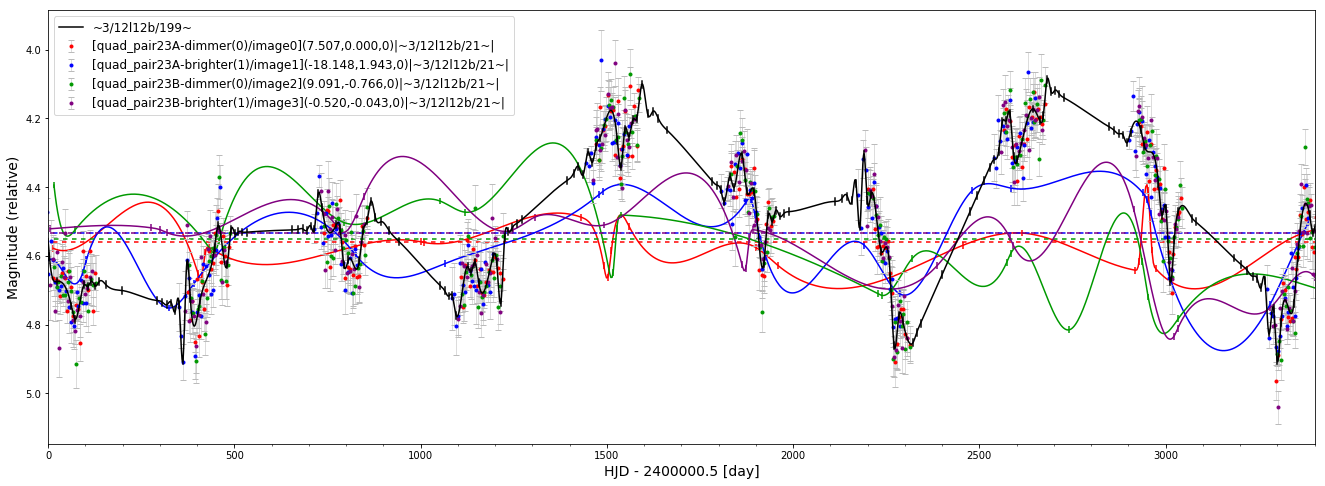

In [123]:
pycs.gen.lc.display(lcs, [spline], knotsize=0.01, figsize=(20, 7), jdrange=(0, 3402))

In [124]:
pycs.gen.util.writepickle((lcs, spline), "optspline.pkl")

Wrote optspline.pkl


In [140]:
%%capture
!\rm -rfv sims_copies sims_mocks
!\rm -rfv sims_copies_opt_spl sims_copies_opt_disp sims_copies_opt_regdiff
!\rm -rfv sims_mocks_opt_spl sims_mocks_opt_disp sims_mocks_opt_regdiff

removed 'sims_copies/4_1536344585.82003.pkl'
removed 'sims_copies/3_1536344585.81675.pkl'
removed 'sims_copies/2_1536344585.81309.pkl'
removed 'sims_copies/1_1536344585.80788.pkl'
removed directory 'sims_copies'
removed 'sims_mocks/1_1536344626.82696.pkl'
removed 'sims_mocks/4_1536344627.06184.pkl'
removed 'sims_mocks/3_1536344626.99064.pkl'
removed 'sims_mocks/2_1536344626.92066.pkl'
removed directory 'sims_mocks'
removed 'sims_copies_opt_spl/1_1536344585.80788_opt.pkl'
removed 'sims_copies_opt_spl/2_1536344585.81309_opt.pkl'
removed 'sims_copies_opt_spl/4_1536344585.82003_runresults.pkl'
removed 'sims_copies_opt_spl/3_1536344585.81675_runresults.pkl'
removed 'sims_copies_opt_spl/2_1536344585.81309_runresults.pkl'
removed 'sims_copies_opt_spl/1_1536344585.80788_runresults.pkl'
removed 'sims_copies_opt_spl/3_1536344585.81675_opt.pkl'
removed 'sims_copies_opt_spl/4_1536344585.82003_opt.pkl'
removed directory 'sims_copies_opt_spl'
removed 'sims_mocks_opt_spl/4_1536344627.06184_opt.pkl'
r

In [141]:
%%capture
n, npkl = 1, 20
Ncopies = n*npkl
print("Making",Ncopies,"copies of the original dataset:")
pycs.sim.draw.multidraw(lcs, onlycopy=True, n=n, npkl=npkl, simset="copies")

Making 20 copies of the original dataset:
Now thowing dice into sims_copies ...
Input shifts :
image0    +7.51 | image1   -18.15 | image2    +9.09 | image3    -0.52
Input delays :
image0image1 =  -25.66 | image0image2 =   +1.58 | image0image3 =   -8.03 | image1image2 =  +27.24 | image1image3 =  +17.63 | image2image3 =   -9.61
Preparing 1 identical copies for pkl 1/20 ...
Wrote sims_copies/1_1536345130.02178.pkl
Preparing 1 identical copies for pkl 2/20 ...
Wrote sims_copies/2_1536345130.02537.pkl
Preparing 1 identical copies for pkl 3/20 ...
Wrote sims_copies/3_1536345130.02838.pkl
Preparing 1 identical copies for pkl 4/20 ...
Wrote sims_copies/4_1536345130.03137.pkl
Preparing 1 identical copies for pkl 5/20 ...
Wrote sims_copies/5_1536345130.03427.pkl
Preparing 1 identical copies for pkl 6/20 ...
Wrote sims_copies/6_1536345130.03722.pkl
Preparing 1 identical copies for pkl 7/20 ...
Wrote sims_copies/7_1536345130.04002.pkl
Preparing 1 identical copies for pkl 8/20 ...
Wrote sims_copies

In [142]:
(modellcs, modelspline)  = pycs.gen.util.readpickle("optspline.pkl")

Read optspline.pkl


In [143]:
def Atweakml(lcs):
    return pycs.sim.twk.tweakml(lcs, beta=-1.5, sigma=0.25, fmin=1/500.0, fmax=None, psplot=False)

def Btweakml(lcs):
    return pycs.sim.twk.tweakml(lcs, beta=-1.0, sigma=0.9, fmin=1/500.0, fmax=None, psplot=False)

def Ctweakml(lcs):
    return pycs.sim.twk.tweakml(lcs, beta=-1.0, sigma=1.5, fmin=1/500.0, fmax=None, psplot=False)

def Dtweakml(lcs):
    return pycs.sim.twk.tweakml(lcs, beta=-0.0, sigma=4.5, fmin=1/500.0, fmax=None, psplot=False)

In [144]:
%%capture
n, npkl = 1, 20
Nmocks = n*npkl
truetsr = 8.0
print("Making",Nmocks,"synthetic datasets, varying time delays by +/-",truetsr/2.0,"days")
pycs.sim.draw.saveresiduals(modellcs, modelspline)
pycs.sim.draw.multidraw(modellcs, modelspline, n=n, npkl=npkl, simset="mocks",
        truetsr=truetsr, tweakml=[Atweakml, Btweakml, Ctweakml, Dtweakml])

Making 20 synthetic datasets, varying time delays by +/- 4.0 days
Now thowing dice into sims_mocks ...
Input shifts :
image0    +7.51 | image1   -18.15 | image2    +9.09 | image3    -0.52
Input delays :
image0image1 =  -25.66 | image0image2 =   +1.58 | image0image3 =   -8.03 | image1image2 =  +27.24 | image1image3 =  +17.63 | image2image3 =   -9.61
Drawing 1 simulations for pkl 1/20 ...
Wrote sims_mocks/1_1536345140.06626.pkl
Drawing 1 simulations for pkl 2/20 ...
Wrote sims_mocks/2_1536345140.14151.pkl
Drawing 1 simulations for pkl 3/20 ...
Wrote sims_mocks/3_1536345140.21108.pkl
Drawing 1 simulations for pkl 4/20 ...
Wrote sims_mocks/4_1536345140.28174.pkl
Drawing 1 simulations for pkl 5/20 ...
Wrote sims_mocks/5_1536345140.35334.pkl
Drawing 1 simulations for pkl 6/20 ...
Wrote sims_mocks/6_1536345140.42311.pkl
Drawing 1 simulations for pkl 7/20 ...
Wrote sims_mocks/7_1536345140.49418.pkl
Drawing 1 simulations for pkl 8/20 ...
Wrote sims_mocks/8_1536345140.63515.pkl
Drawing 1 simulat

In [145]:
%%capture
pycs.sim.run.multirun("copies", lcs, spl, optset="spl", tsrand=10.0, keepopt=True)

In [146]:
%%capture
tsrand = 1.0
pycs.sim.run.multirun("mocks", lcs, spl, optset="spl", tsrand=tsrand, keepopt=True)

Reading 20 runresult pickles...
OK, I have collected 20 runs from Free-knot spline technique
Wrote sims_copies_opt_spl_delays.pkl
Plotting "Free-knot spline technique (Measured, 20) "
     Labels : image0, image1, image2, image3
     Median shifts : 4.35, -21.77, 5.87, -3.73
     Std shifts : 2.46, 2.61, 2.52, 2.46


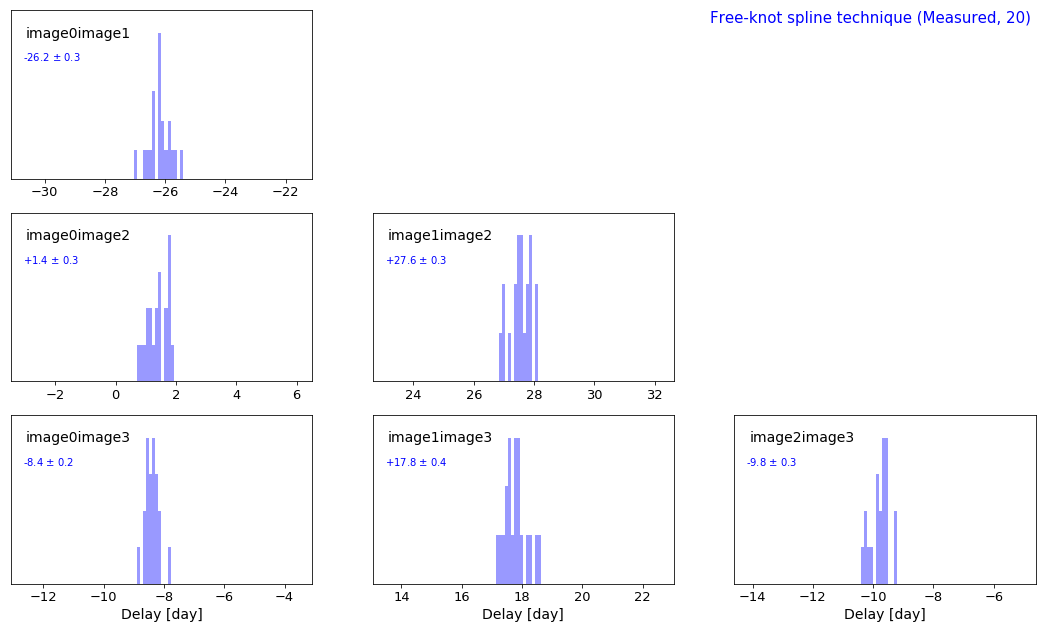

In [147]:
dataresults = [
        pycs.sim.run.collect("sims_copies_opt_spl", "blue", "Free-knot spline technique")
]
pycs.sim.plot.hists(dataresults, r=5.0, nbins=100, showqs=False,
        filename="fig_intrinsicvariance.pdf", dataout=True)

Reading 20 runresult pickles...
OK, I have collected 20 runs from Free-knot spline technique
Wrote sims_mocks_opt_spl_errorbars.pkl


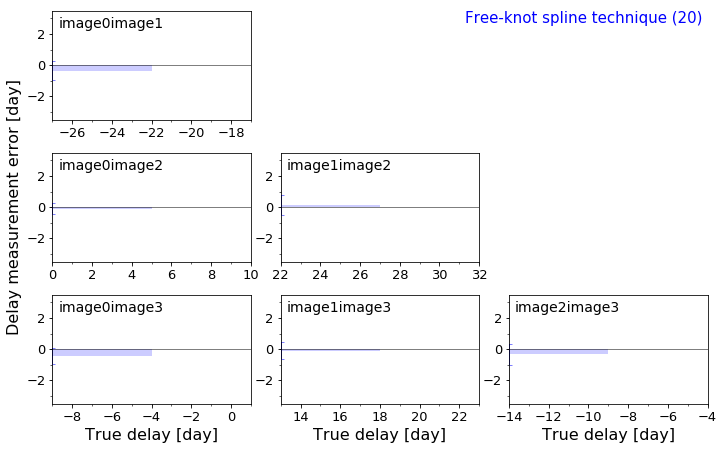

In [148]:
simresults = [
        pycs.sim.run.collect("sims_mocks_opt_spl", "blue", "Free-knot spline technique")
]
pycs.sim.plot.measvstrue(simresults, errorrange=3.5, r=5.0, nbins = 1, binclip=True, binclipr=20.0,
        plotpoints=False, filename="fig_measvstrue.pdf", dataout=True)


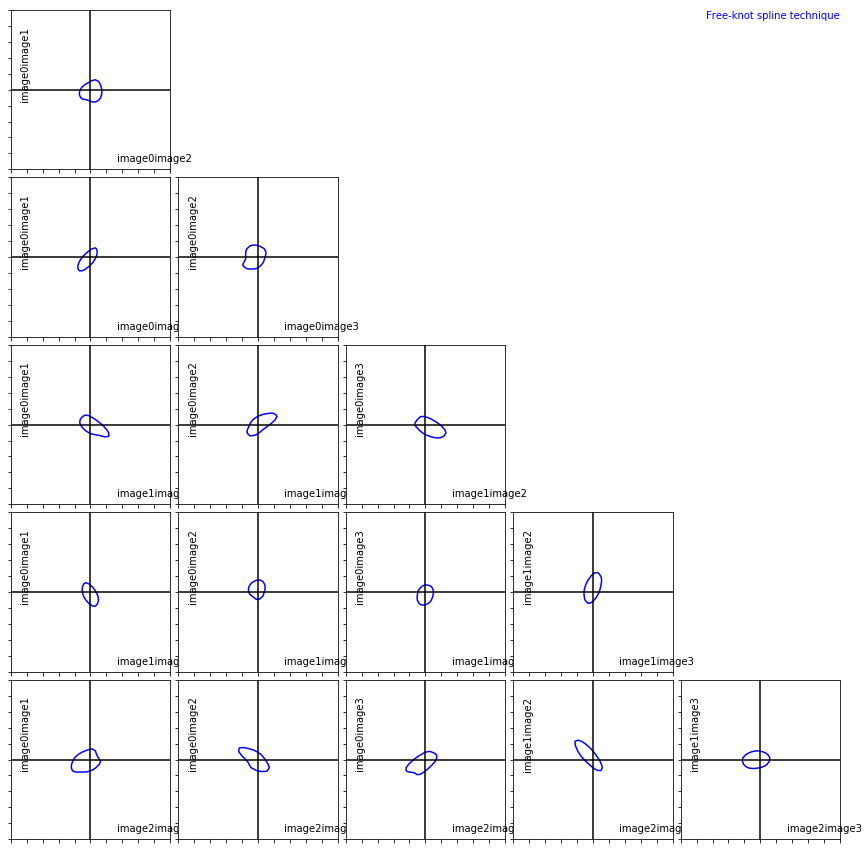

In [149]:
pycs.sim.plot.covplot(simresults, filename="fig_covplot.pdf")

In [150]:
dataresults = [(pycs.gen.util.readpickle("sims_copies_opt_spl_delays.pkl"),
               pycs.gen.util.readpickle("sims_mocks_opt_spl_errorbars.pkl"))]

Read sims_copies_opt_spl_delays.pkl
Read sims_mocks_opt_spl_errorbars.pkl


Objects : image0, image1, image2, image3
Delays : Free-knot spline technique <-> Errors : Free-knot spline technique
################################################################################
           Delay image0image1
                   Free-knot spline technique : -26.17 +/- 0.68 (0.59, 0.34)
################################################################################
           Delay image0image2
                   Free-knot spline technique :  +1.39 +/- 0.37 (0.36, 0.10)
################################################################################
           Delay image1image2
                   Free-knot spline technique : +27.56 +/- 0.66 (0.64, 0.17)
################################################################################
           Delay image0image3
                   Free-knot spline technique :  -8.38 +/- 0.69 (0.53, 0.43)
################################################################################
           Delay image1image3
                   F

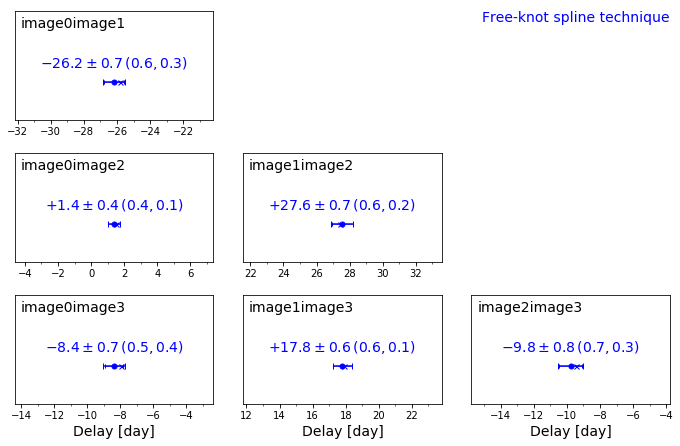

In [151]:
pycs.sim.plot.newdelayplot(dataresults, rplot=6.0, displaytext=True,
        filename = "fig_delays.pdf", refshifts=[{"colour":"gray", "shifts":(0, -5, -20, -70)}])

In [ ]:
1.91 (1.08, 1.57
      

In [152]:
np.hypot(1.08, 1.57)

1.9055970193091718